# Regresion lineal

In [12]:
#importaciones
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

import matplotlib.dates as mdates

## Prueba de que funciona

In [13]:
#ensayo
reg = linear_model.LinearRegression()

reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) 
reg.coef_ 
reg.intercept_
reg.predict([[3, 3]])



array([3.])

## Regresion lineal con housing 


In [14]:
#
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Regresion linea Con Baloto

In [15]:
#importa dataframe
df = pd.read_csv('Baloto.csv')
df.columns = ['fecha', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6']
df.head()

,fecha,b1,b2,b3,b4,b5,b6
0,30.09.2023,10,15,19,21,41,10
1,27.09.2023,2,20,25,36,41,11
2,23.09.2023,13,20,24,30,42,12
3,20.09.2023,2,3,10,21,23,14
4,16.09.2023,6,29,32,39,43,16


In [16]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   2333 non-null   object
 1   b1      2333 non-null   int64 
 2   b2      2333 non-null   int64 
 3   b3      2333 non-null   int64 
 4   b4      2333 non-null   int64 
 5   b5      2333 non-null   int64 
 6   b6      2333 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 127.7+ KB


In [17]:
#nulls
df.isnull().sum()

fecha    0
b1       0
b2       0
b3       0
b4       0
b5       0
b6       0
dtype: int64

In [18]:
# tipos de datos
df.dtypes

fecha    object
b1        int64
b2        int64
b3        int64
b4        int64
b5        int64
b6        int64
dtype: object

In [19]:
df['fecha']

0       30.09.2023
1       27.09.2023
2       23.09.2023
3       20.09.2023
4       16.09.2023
           ...    
2328    24.02.2001
2329    17.02.2001
2330    10.02.2001
2331    03.02.2001
2332    27.01.2001
Name: fecha, Length: 2333, dtype: object

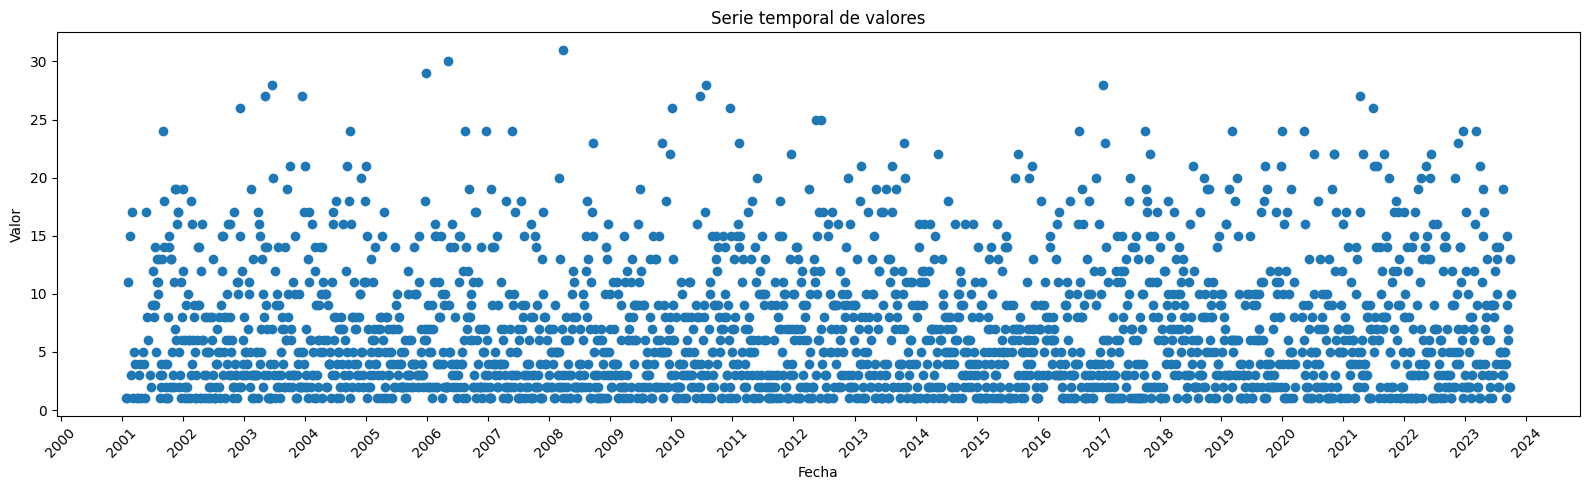

In [20]:
# Grafica 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 1. Convertir la columna de fechas al tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%m.%Y')

# 2. Ordenar por fecha (opcional pero recomendable)
df = df.sort_values(by='fecha')

# 3. Graficar
fig, ax = plt.subplots(figsize=(16, 5))

ax.scatter(df['fecha'], df['b1'], marker='o') 

# 4. Configurar el eje X con fechas legibles
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ticks cada año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato año

# Rotar las etiquetas del eje X para legibilidad
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie temporal de valores')

plt.tight_layout()
plt.show()


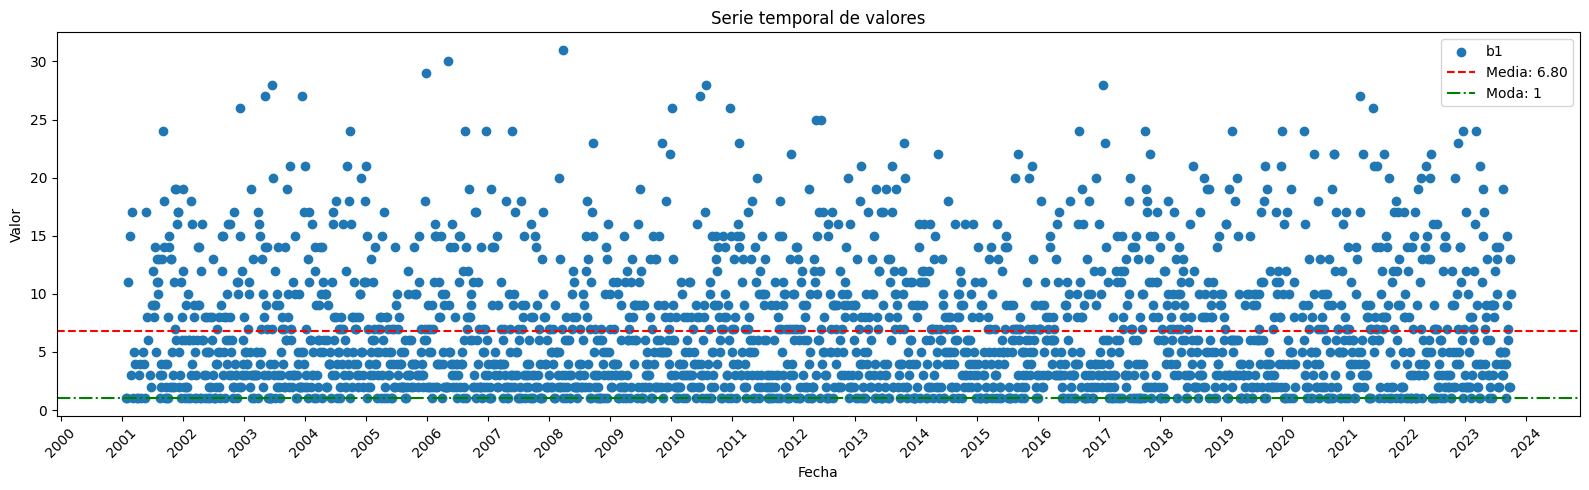

In [21]:
# media, moda y 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Convertir la columna de fechas al tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%m.%Y')

# 2. Ordenar por fecha (opcional pero recomendable)
df = df.sort_values(by='fecha')

# Calcular media y moda de la columna 'b1'
media_b1 = df['b1'].mean()
moda_b1 = df['b1'].mode()[0]  # Puede haber más de una moda, tomamos la primera

# 3. Graficar
fig, ax = plt.subplots(figsize=(16, 5))

ax.scatter(df['fecha'], df['b1'], marker='o', label='b1') 

# Agregar líneas de media y moda
ax.axhline(media_b1, color='red', linestyle='--', label=f'Media: {media_b1:.2f}')
ax.axhline(moda_b1, color='green', linestyle='-.', label=f'Moda: {moda_b1}')

# 4. Configurar el eje X con fechas legibles
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ticks cada año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato año

# Rotar las etiquetas del eje X para legibilidad
plt.xticks(rotation=45)

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie temporal de valores')

# Mostrar leyenda
plt.legend()

plt.tight_layout()
plt.show()
# ...existing code...


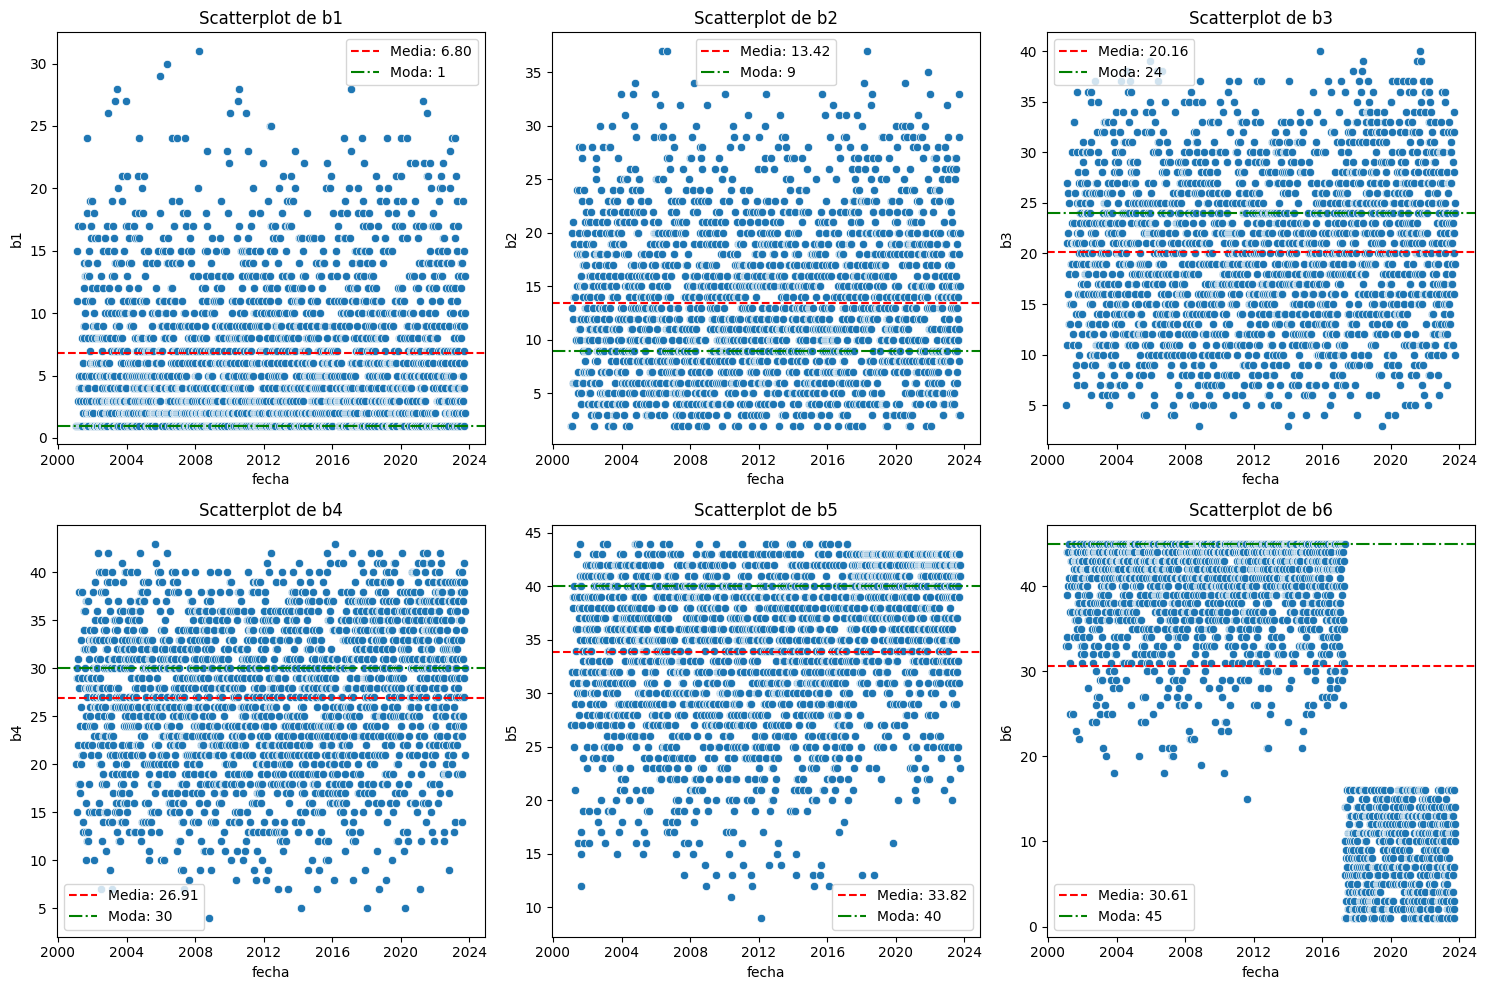

In [22]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

# Lista de columnas para los scatterplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los scatterplots
for i, columna in enumerate(columnas):
    sns.scatterplot(x=df['fecha'], y=df[columna], ax=axes[i]) #Usar Fecha como eje X

    # Calcular media y moda
    media = df[columna].mean()
    moda = df[columna].mode()[0]  # Puede haber más de una moda, tomamos la primera

    # Agregar líneas de media y moda
    axes[i].axhline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    axes[i].axhline(moda, color='green', linestyle='-.', label=f'Moda: {moda}')

    axes[i].set_title(f'Scatterplot de {columna}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [23]:
#  Convertir la columna 'Fecha' a datetime
# el formato coincida exactamente con tus fechas ('dd.mm.yyyy')
try:
    df['fecha'] = pd.to_datetime(df['fecha'], format='%d.%m.%Y')
except ValueError as e:
    print(f"Error al convertir fechas: {e}")
    print("Verifica que TODAS las fechas en la columna 'Fecha' tengan el formato 'dd.mm.yyyy'.")
    # Intenta inferir el formato si el especificado falla (menos fiable)
    # df['Fecha_dt'] = pd.to_datetime(df['Fecha'], infer_datetime_format=True)

# Convertir la fecha datetime a un número ordinal para la regresión
# El número ordinal representa el número de días desde una fecha de referencia (año 1, día 1)
df['fecha'] = df['fecha'].apply(lambda date: date.toordinal())

print("\nDataFrame con fechas convertidas:")

df.info() # Verifica los tipos de datos


DataFrame con fechas convertidas:
<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2332 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   fecha   2333 non-null   int64
 1   b1      2333 non-null   int64
 2   b2      2333 non-null   int64
 3   b3      2333 non-null   int64
 4   b4      2333 non-null   int64
 5   b5      2333 non-null   int64
 6   b6      2333 non-null   int64
dtypes: int64(7)
memory usage: 145.8 KB


In [24]:
print(df["fecha"].isna().sum())  # Cantidad de valores no convertidos


0


In [25]:
print(df[df["fecha"].isna()])


Empty DataFrame
Columns: [fecha, b1, b2, b3, b4, b5, b6]
Index: []


In [26]:
df = df.dropna(subset=["fecha"]) # Elimina filas con fechas no convertidas


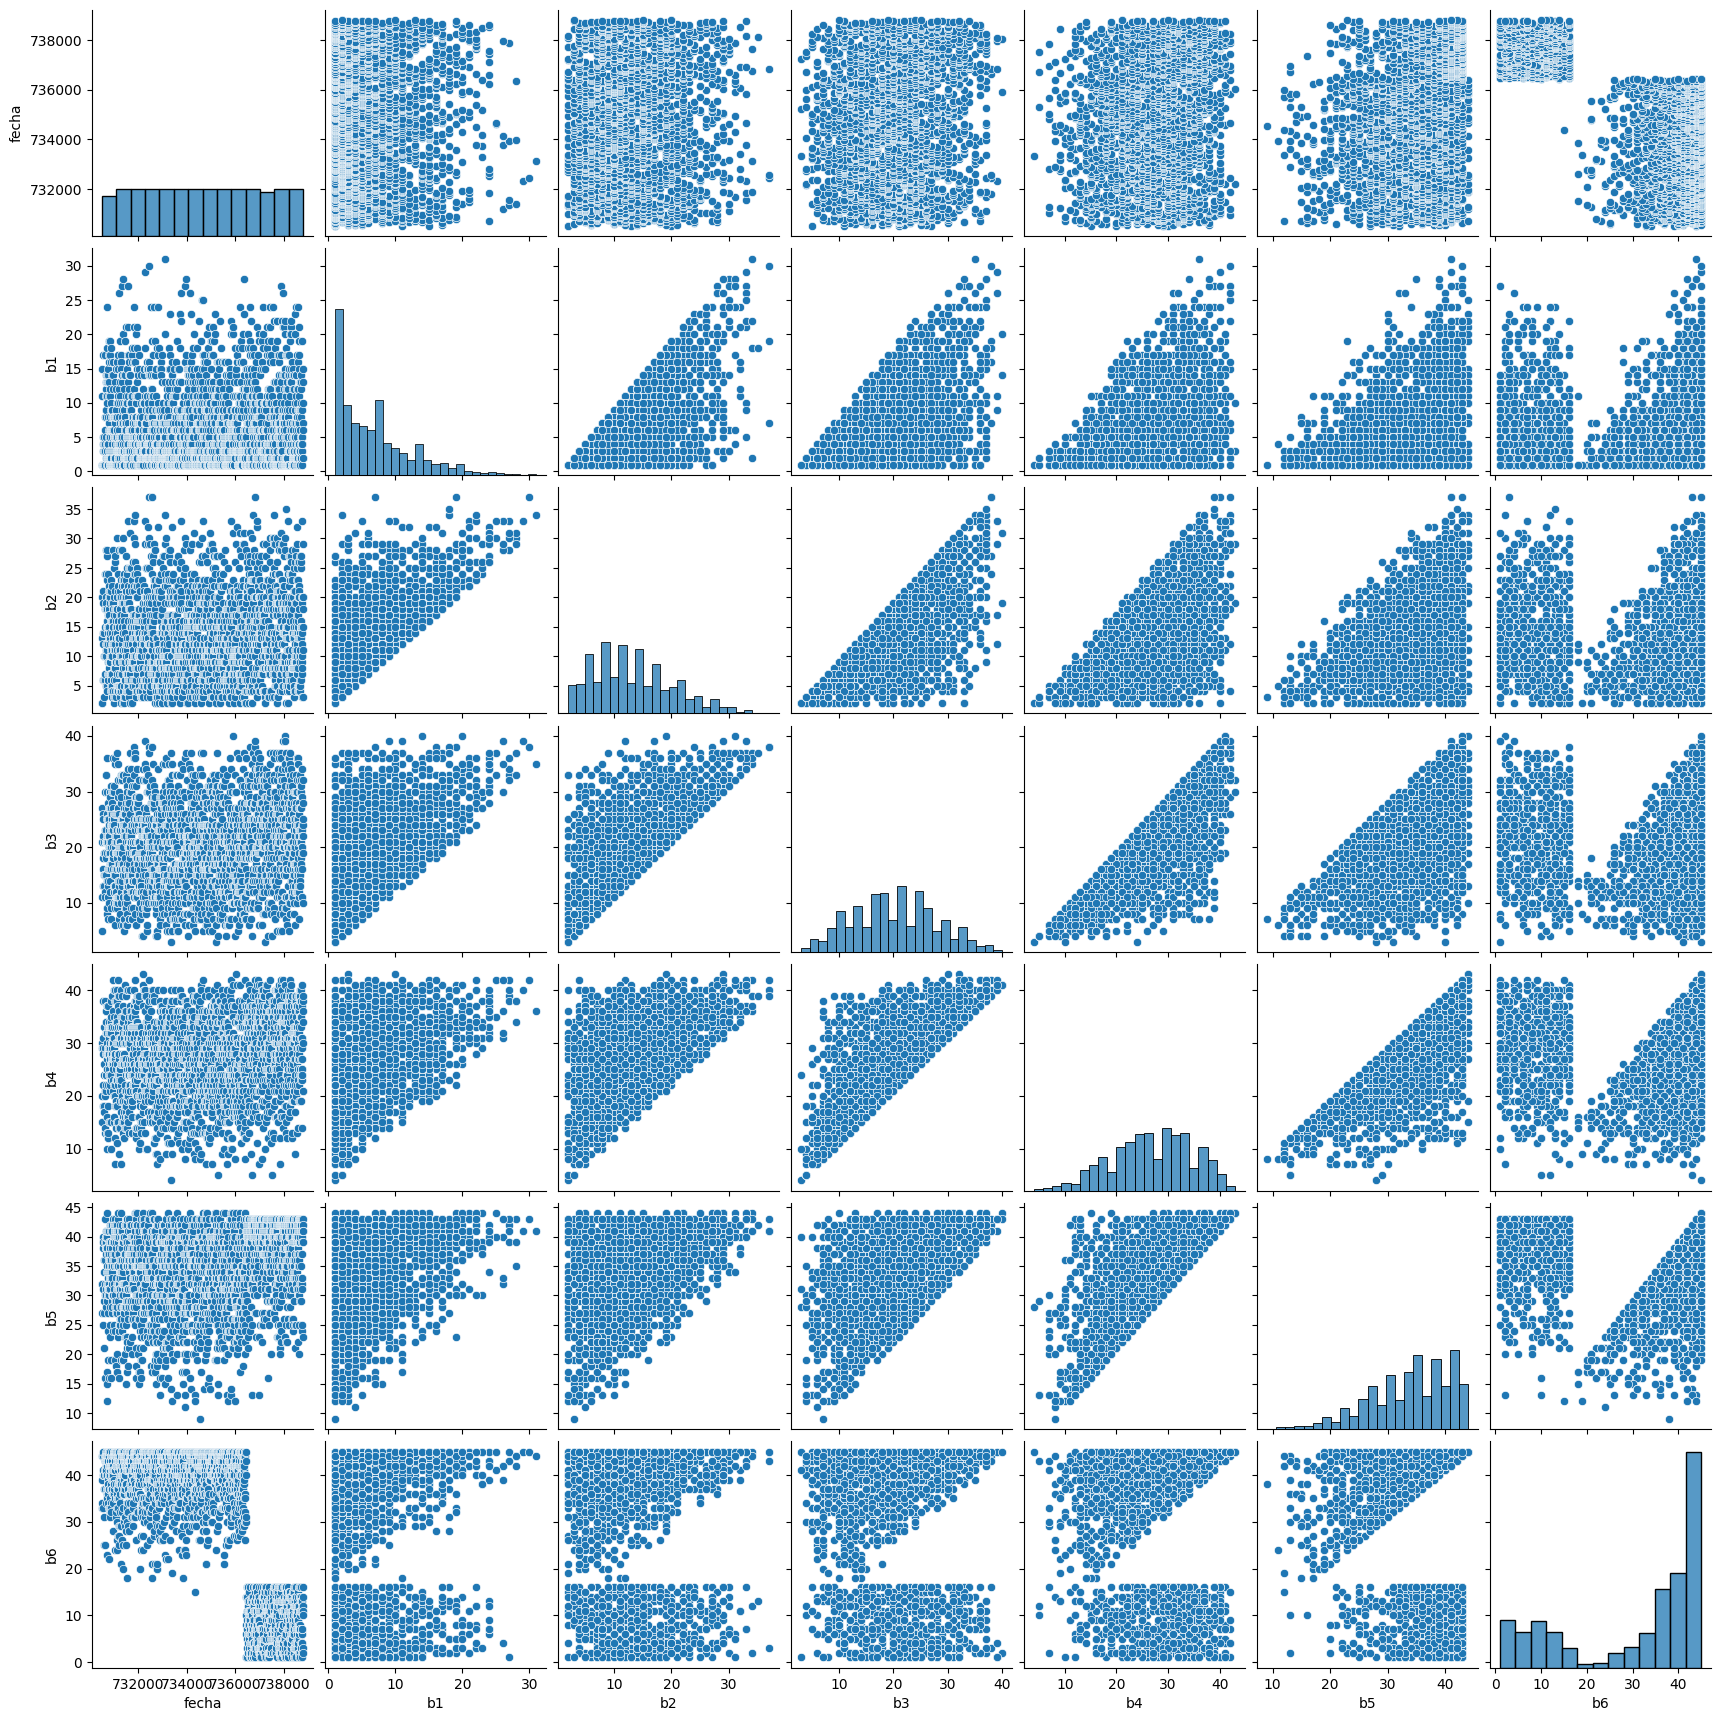

In [27]:
sns.pairplot(df) # Call pairplot from seaborn library


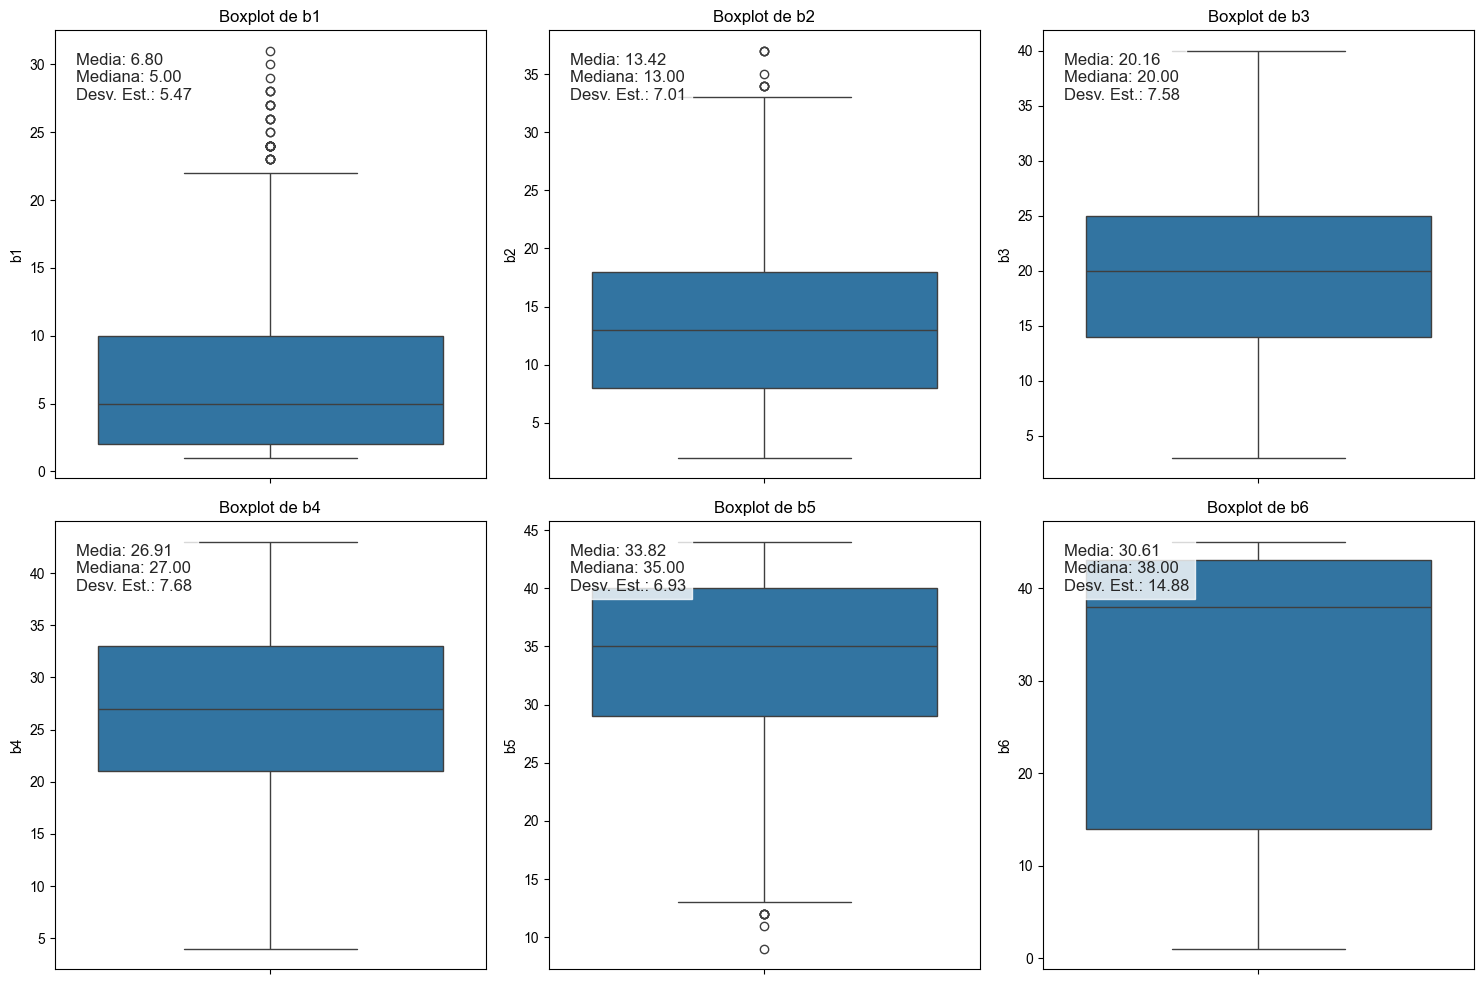

In [28]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
axes = axes.flatten()  # Aplanar el array de axes

#from pypalettes import get_hex
sns.set_theme(style="darkgrid")
#palette = get_hex("Acadia", keep_first_n=3)

# Lista de columnas para los boxplots
columnas = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']

# Iterar sobre las columnas y crear los boxplots
for i, columna in enumerate(columnas):
    sns.boxplot(y=df[columna], ax=axes[i])  # Cambiar a 'y' para boxplots verticales
    axes[i].set_title(f'Boxplot de {columna}')

    # Calcular y mostrar estadísticas
    stats = df[columna].describe()
    stats_str = f"Media: {stats['mean']:.2f}\nMediana: {stats['50%']:.2f}\nDesv. Est.: {stats['std']:.2f}"
    axes[i].text(0.05, 0.95, stats_str, transform=axes[i].transAxes,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

<Axes: xlabel='fecha', ylabel='b1'>

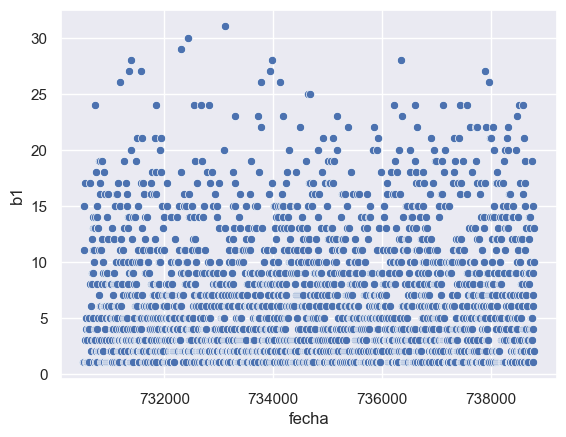

In [29]:
# Graficar la relación entre 'fecha' y 'b1'
sns.scatterplot(x=df['fecha'], y=df['b1'])

In [30]:
# Definir las variables dependiente e independiente
# Aquí 'b1' es la variable dependiente y 'fecha' es la variable independiente
y = df['b1']
x = df['fecha']

In [31]:
# Convertir y a un DataFrame
seriey = pd.Series(y)
y =seriey.to_frame()

In [32]:
# Convertir x a un DataFrame
seriex = pd.Series(x)
x = seriex.to_frame()

In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo_b1 = LinearRegression()


In [34]:
# Ajustar el modelo
modelo_b1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
#Predecir los valores de 'b1' en el conjunto de prueba
y_pred_b1 = modelo_b1.predict(X_test)

In [36]:
# calcular métricas de rendimiento error cuadrático medio, coeficiente de determinación
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_b1))
print("Coeficiente de determinación: ", r2_score(y_test, y_pred_b1))

Error cuadrático medio:  29.312204898651196
Coeficiente de determinación:  0.0026666428266851616


In [37]:
# calcular el error absoluto medio r2 
print("Coeficientes del modelo: ", modelo_b1.coef_)
print("Intercepto del modelo: ", modelo_b1.intercept_)
print("R^2 del modelo: ", modelo_b1.score(X_test, y_test))


Coeficientes del modelo:  [[7.30884105e-05]]
Intercepto del modelo:  [-46.92150188]
R^2 del modelo:  0.0026666428266851616


In [38]:
# Predecir los valores de 'b1' en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score
y_test = y_test.values.reshape(-1, 1)  # Asegurarse de que y_test tenga la forma correcta
y_pred_b1 = modelo_b1.predict(X_test)


In [39]:
# Imprimir los resultados del modelo
print("Resultados del modelo de regresión lineal:")
print("Coeficientes del modelo: ", modelo_b1.coef_)
print("Intercepto del modelo: ", modelo_b1.intercept_)
print("R^2 del modelo: ", modelo_b1.score(X_test, y_test))
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_b1))
print("Coeficiente de determinación: ", r2_score(y_test, y_pred_b1))

Resultados del modelo de regresión lineal:
Coeficientes del modelo:  [[7.30884105e-05]]
Intercepto del modelo:  [-46.92150188]
R^2 del modelo:  0.0026666428266851616
Error cuadrático medio:  29.312204898651196
Coeficiente de determinación:  0.0026666428266851616


## **Conclusiones:**

- **El valor de R² (~0.0027) es muy cercano a 0:** Esto indica que el modelo no logra explicar la variabilidad de la variable dependiente (`b1`) a partir de la variable independiente (`fecha`). Es decir, la fecha no predice bien el valor de `b1`.
- **El error cuadrático medio es relativamente alto:** Esto sugiere que las predicciones del modelo se alejan bastante de los valores reales.
- **El coeficiente es muy pequeño:** El impacto de la fecha sobre `b1` es prácticamente nulo.

**En resumen:**  
El modelo de regresión lineal no es adecuado para predecir `b1` usando solo la fecha. Probablemente no existe una relación lineal significativa entre ambas variables, o se requieren más variables para mejorar la predicción.